In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from keras.utils import image_dataset_from_directory, plot_model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten
from keras.metrics import SparseTopKCategoricalAccuracy
from keras.callbacks import EarlyStopping

In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [3]:
img_dims = (256, 256)
batch_size = 32
n_inputs = img_dims[0] * img_dims[1] * 3

train = image_dataset_from_directory(
    directory='cards/train',
    image_size=img_dims,
    batch_size=batch_size
)

val = image_dataset_from_directory(
    directory='cards/valid',
    image_size=img_dims,
    batch_size=batch_size
)

test = image_dataset_from_directory(
    directory='cards/test',
    image_size=img_dims,
    batch_size=batch_size
)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [4]:
model1 = Sequential()


model1.add(Conv2D(
    filters=32,                     
    kernel_size=(3, 3),             
    activation='relu',              
    input_shape=img_dims + (3,),
    data_format="channels_last"
))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(
    filters=32,                     
    kernel_size=(3, 3),             
    activation='relu',              
    use_bias=True                   
))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.2))


model1.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3),
    activation='relu',
    use_bias=True
))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.2))


model1.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3),
    activation='relu',
    use_bias=True
))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.2))


model1.add(Conv2D(
    filters=512, 
    kernel_size=(3, 3),
    activation='relu',
    use_bias=True
))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(rate=0.2))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(53, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [5]:
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', SparseTopKCategoricalAccuracy(k=3, name = 'Top3')]
)

callbacks = [
    EarlyStopping(
        monitor="accuracy",
        min_delta=1e-4,
        patience=3,
        verbose=1,
    )
]

history1 = model1.fit(
    train,
    validation_data = val,
    epochs = 10000,
    callbacks = callbacks
)

Epoch 1/10000
239/239 [==============================] - 106s 347ms/step - loss: 5.6822 - accuracy: 0.1120 - Top3: 0.2492 - val_loss: 2.6511 - val_accuracy: 0.2528 - val_Top3: 0.4604
Epoch 2/10000
239/239 [==============================] - 19s 77ms/step - loss: 2.3403 - accuracy: 0.3265 - Top3: 0.5900 - val_loss: 1.6378 - val_accuracy: 0.5736 - val_Top3: 0.7736
Epoch 3/10000
239/239 [==============================] - 19s 77ms/step - loss: 1.7287 - accuracy: 0.5192 - Top3: 0.7221 - val_loss: 1.2219 - val_accuracy: 0.6830 - val_Top3: 0.8415
Epoch 4/10000
239/239 [==============================] - 19s 78ms/step - loss: 1.4219 - accuracy: 0.6060 - Top3: 0.7747 - val_loss: 1.0430 - val_accuracy: 0.7132 - val_Top3: 0.8566
Epoch 5/10000
239/239 [==============================] - 18s 75ms/step - loss: 1.1982 - accuracy: 0.6689 - Top3: 0.8203 - val_loss: 0.9397 - val_accuracy: 0.7660 - val_Top3: 0.8792
Epoch 6/10000
239/239 [==============================] - 18s 75ms/step - loss: 1.0097 - accur

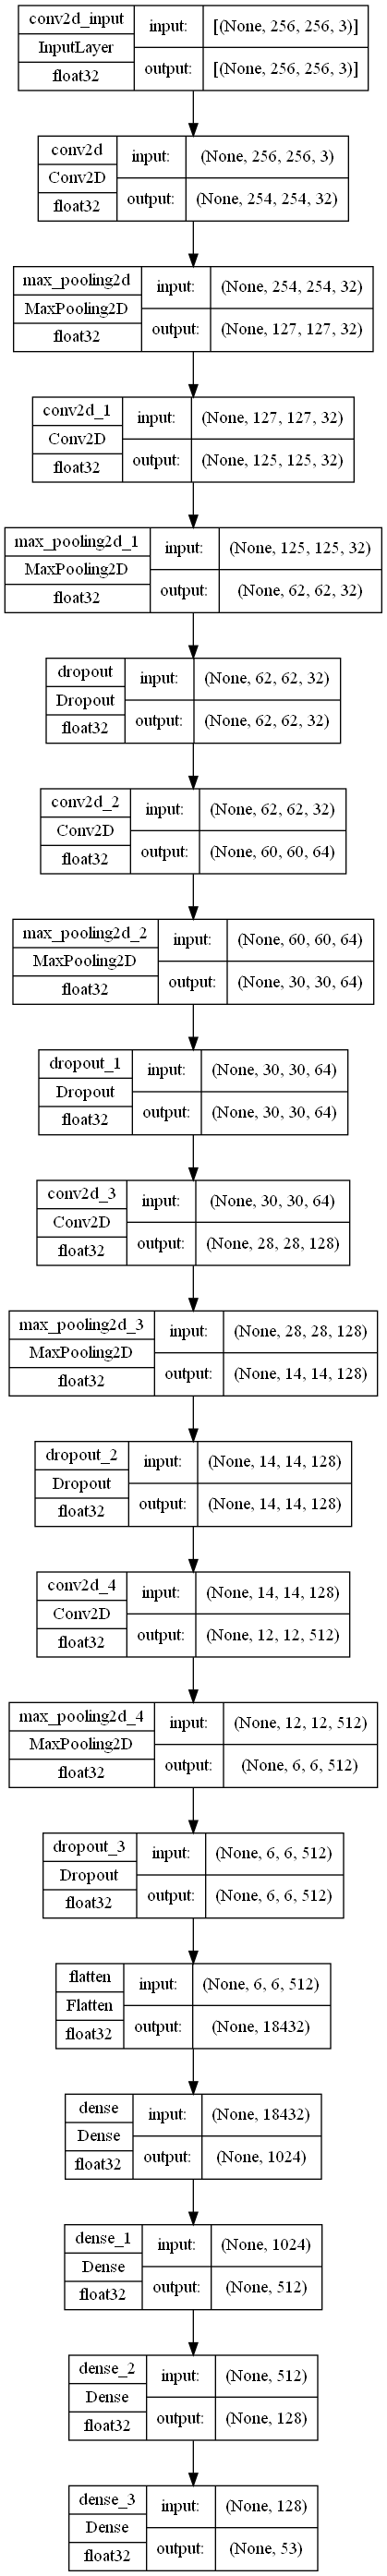

In [6]:
plot_model(
    model1,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
)

In [7]:
model1.evaluate(test)

9/9 [==============================] - 1s 26ms/step - loss: 1.0390 - accuracy: 0.8000 - Top3: 0.8717


[1.0390325784683228, 0.800000011920929, 0.8716981410980225]

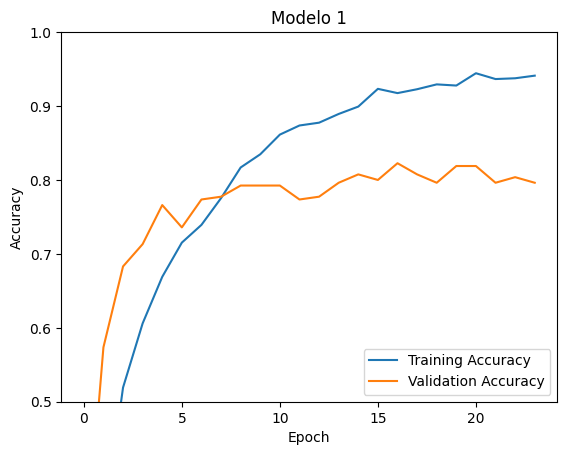

In [8]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Modelo 1')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [9]:
model1.save_weights(input('Nombre: ')+'.h5', overwrite=True)